# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} = 
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$ 

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год и месяц подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;
Какие выводы можно сделать?

In [323]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

invert = lambda dict_: dict(map(reversed, dict_.items())) #{v:k for k,v in dict_.items()}

In [12]:
# Шаг 1. Загрузка данных;
df = pd.read_csv('.\dataset_telecom+(3).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [13]:
# Шаг 2. Первичная обработка данных (при необходимости):
# скорректировать заголовки;

header_translate_dict = dict(zip(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц',
       'Дата подключения тарифа'], 
                                  ['age', 'avg_bill', 
        'avg_call_duration', 'calls_day',
        'calls_evening', 'calls_night',
        'calls_intercity', 'calls_international',
        'fraction_stationary', 'num_sms',
        'date_activated']))
df.columns = df.columns.map(header_translate_dict) # меняет исходный df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4492 non-null   int64  
 1   avg_bill             4468 non-null   float64
 2   avg_call_duration    4475 non-null   float64
 3   calls_day            4472 non-null   float64
 4   calls_evening        4489 non-null   float64
 5   calls_night          4492 non-null   object 
 6   calls_intercity      4492 non-null   object 
 7   calls_international  4492 non-null   int64  
 8   fraction_stationary  4492 non-null   object 
 9   num_sms              4492 non-null   object 
 10  date_activated       4492 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 386.2+ KB


In [90]:
# скорректировать типы признаков;
columns_that_start_with = lambda prefix: list(filter(lambda s: s.startswith(prefix), df.columns))

re_q = re.compile(r"['](.*)[']")    
        
int_cols = 'age,fraction_stationary,num_sms'.split(',') + columns_that_start_with('calls_')
typedict = dict().fromkeys(int_cols, 'int64')
typedict.update(dict().fromkeys(columns_that_start_with('avg_'), 'float'))
typedict['date_activated'] = 'datetime64[ns]'

# df.astype(typedict)  # NaN can`t be converted to int
mask_nan = df[int_cols].isna().agg(any, axis=1) # mask_nan.sum() == 23 -> drop
df2 = df.drop(df.index[mask_nan])
# df2.astype(typedict) # quotes again
df3 = df2.applymap(lambda x: x if re_q.fullmatch(str(x)) is None else 
                             re_q.fullmatch(str(x))[1])
df_t = df3.astype(typedict)

df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  4469 non-null   int64         
 1   avg_bill             4446 non-null   float64       
 2   avg_call_duration    4453 non-null   float64       
 3   calls_day            4469 non-null   int64         
 4   calls_evening        4469 non-null   int64         
 5   calls_night          4469 non-null   int64         
 6   calls_intercity      4469 non-null   int64         
 7   calls_international  4469 non-null   int64         
 8   fraction_stationary  4469 non-null   int64         
 9   num_sms              4469 non-null   int64         
 10  date_activated       4469 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 419.0 KB


In [92]:
# проверить наличие дублирующихся записей;
df_t.duplicated().sum() # == 0

0

,median 98%,whisker
age,28,0
avg_bill,90,324
avg_call_duration,89,125
calls_day,61,272
calls_evening,68,0
calls_night,45,517
calls_intercity,45,493
calls_international,43,820
fraction_stationary,45,49
num_sms,45,235


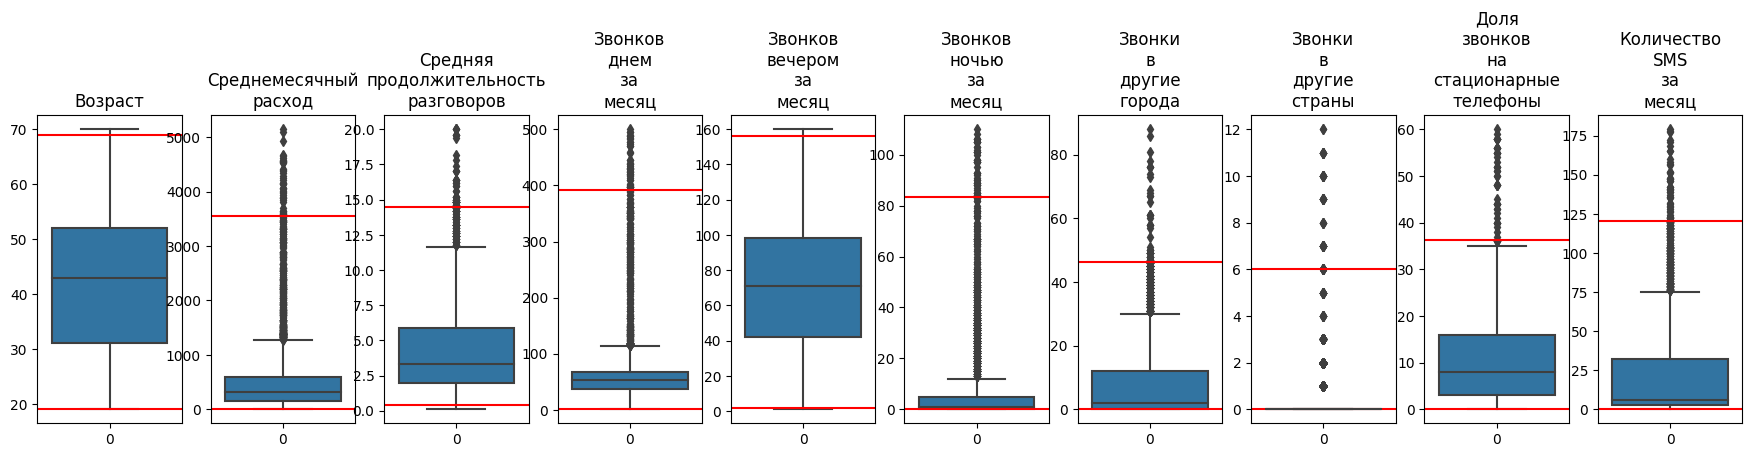

In [199]:
# проверить наличие аномальных значений;
def WhiskFilter(s):
    k = 1.5
    q1, q3 = s.quantile(.25), s.quantile(.75)
    iqr = q3 -q1
    low, high = q1 -k*iqr, q3 +k*iqr
    return s.between(low, high) | s.isna() # нечисло несопоставимо с числами

def MedianFilter(s, fraction):
    fraction = min(max(0, fraction), 1)
    low, high = s.quantile(.5 -.5*fraction), s.quantile(.5 +.5*fraction)
    return s.between(low, high) | s.isna()


mask_numerical = list(df_t.columns) # set(df_t.columns)-{'date_activated'}
mask_numerical.remove('date_activated')
df_n = df_t[mask_numerical]

anomalies_w = ~df_n.apply(WhiskFilter)

anomalies_m = ~df_n.apply(MedianFilter, fraction=.98) # filter out top 1% and bottom 1%

stats = pd.DataFrame({'median 98%':anomalies_m.agg(sum), 'whisker': anomalies_w.agg(sum)})
stats.loc['total_1_or_more_anomalous'] = [anomalies_m.agg(any, axis=1).sum(), anomalies_w.agg(any, axis=1).sum()]
display(stats)

plt.subplots(1, len(df_n.columns), figsize=(22, 4))
for i,(col,s) in enumerate(df_n.items()):
    plt.subplot(1, len(df_n.columns), i+1)
    sns.boxplot(data=s)
    plt.hlines([s.quantile(.01), s.quantile(.99)], -.5, .5, color='red')
    plt.title(invert(header_translate_dict)[col].replace(' ','\n'))
plt.show()

Распределение аномальных значений признаков 'Среднемесячный расход', 'Средняя продолжительность разговоров', 'Звонков днем за месяц', 'Звонков ночью за месяц', 'Звонки в другие города', 'Звонки в другие страны', 'Доля звонков на стационарные телефоны', 'Количество SMS за месяц' позволяет предположит существование несколких классов пользователей, чья статистика использования услуг значительно отклоняется от среднего. Найденные аномальные значения не отбрасываем

In [171]:
# восстановить пропущенные значения;
df_t.isna().agg(any, axis=1).sum() #== 39 -> drop

# здесь, для целей демонстрации, заменю на медианные
df_r = df_t.copy()
for col,s in df_t.items():
    n = s.isna().sum()
    med = s.median()
    if n > 0:
        print('заменено %d значений в столбце %s на медианные (%s)' % (n,col,str(med)))
        df_r.loc[s.isna(), col] = med
df_r.info()

заменено 23 значений в столбце avg_bill на медианные (314.96500000000003)
заменено 16 значений в столбце avg_call_duration на медианные (3.3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  4469 non-null   int64         
 1   avg_bill             4469 non-null   float64       
 2   avg_call_duration    4469 non-null   float64       
 3   calls_day            4469 non-null   int64         
 4   calls_evening        4469 non-null   int64         
 5   calls_night          4469 non-null   int64         
 6   calls_intercity      4469 non-null   int64         
 7   calls_international  4469 non-null   int64         
 8   fraction_stationary  4469 non-null   int64         
 9   num_sms              4469 non-null   int64         
 10  date_activated       4469 non-null   datetime64[ns]
dtypes: da

In [322]:
#Шаг 3. Добавление новых переменных:
# по значениям признака Возраст введите новую переменную Возрастная категория, принимающую значения 
# "студент", "аспирант", "бизнесмен" и "знаток"
header_translate_dict['Возрастная категория'] = 'cat_age'
labels = ["студент", "аспирант", "бизнесмен", "знаток"]
bins = pd.IntervalIndex.from_tuples([(19, 24), (25, 33), (34, 56), (57, 70)], closed="both")

df_c = df_r.copy()
df_c['cat_age'] = pd.cut(df_c['age'], bins=bins).cat.rename_categories(labels)
display(df_c['cat_age'])
df_c['cat_age'].value_counts()

0         студент
1       бизнесмен
2       бизнесмен
3       бизнесмен
4        аспирант
          ...    
4487    бизнесмен
4488    бизнесмен
4489       знаток
4490    бизнесмен
4491     аспирант
Name: cat_age, Length: 4469, dtype: category
Categories (4, object): ['студент' < 'аспирант' < 'бизнесмен' < 'знаток']

бизнесмен    2471
аспирант      827
знаток        657
студент       514
Name: cat_age, dtype: int64

In [339]:
#по значениям признака Дата подключения тарифа создайте признаки: Год подключения, Месяц подключения, Дата подключения
month_names = [datetime.date(2000,n+1,1).strftime('%B') for n in range(0,12)]

header_translate_dict['Год подключения'] = 'act_year'
header_translate_dict['Месяц подключения'] = 'act_month'
header_translate_dict['Дата подключения'] = 'act_date'

df_c['act_year'] = df_c['date_activated'].dt.year
df_c['act_month'] = df_c['date_activated'].dt.month.astype(pd.CategoricalDtype(ordered=True)).cat.rename_categories(month_names)
df_c['act_date'] = df_c['date_activated'].dt.date
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469 entries, 0 to 4491
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  4469 non-null   int64         
 1   avg_bill             4469 non-null   float64       
 2   avg_call_duration    4469 non-null   float64       
 3   calls_day            4469 non-null   int64         
 4   calls_evening        4469 non-null   int64         
 5   calls_night          4469 non-null   int64         
 6   calls_intercity      4469 non-null   int64         
 7   calls_international  4469 non-null   int64         
 8   fraction_stationary  4469 non-null   int64         
 9   num_sms              4469 non-null   int64         
 10  date_activated       4469 non-null   datetime64[ns]
 11  cat_age              4469 non-null   category      
 12  act_year             4469 non-null   int64         
 13  act_month            4469 non-nul

Месяц подключения,January,February,March,April,May,June,July,August,September,October,November,December
Год подключения,,,,,,,,,,,,
2015,35,61,41,50,54,52,47,47,35,59,50,57
2016,63,60,49,46,52,56,48,67,66,46,52,43
2017,55,49,52,58,62,61,47,62,60,55,50,63
2018,61,55,48,56,65,56,51,56,59,53,59,55
2019,49,43,42,55,55,46,49,65,56,53,37,49
2020,53,55,54,57,52,60,52,58,48,55,58,39
2021,43,45,48,62,66,58,54,67,64,47,50,41


меньше всего клиентов подключались в [2015, 'January']
больше всего клиентов подключались в [2016, 'August']


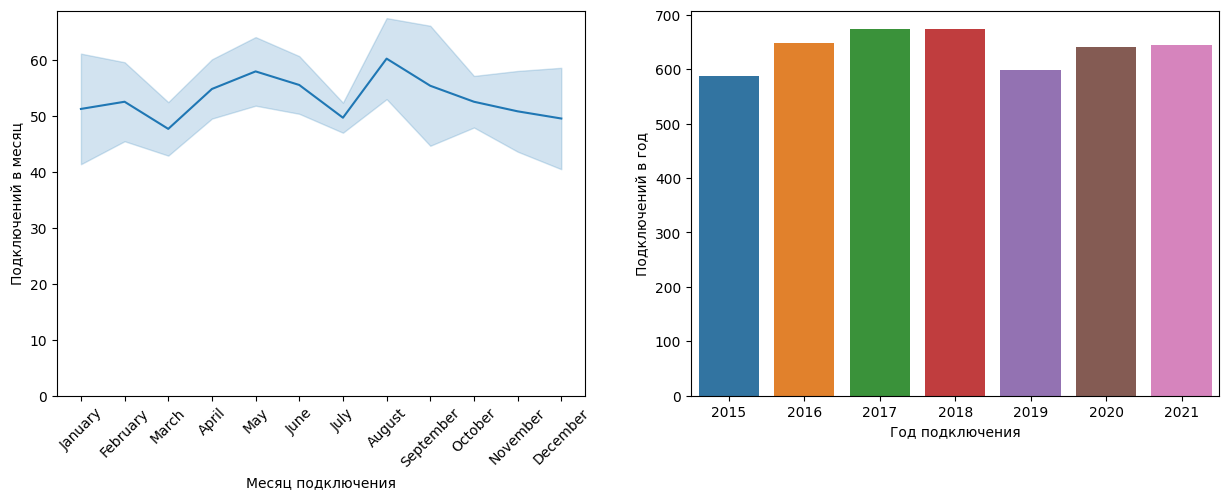

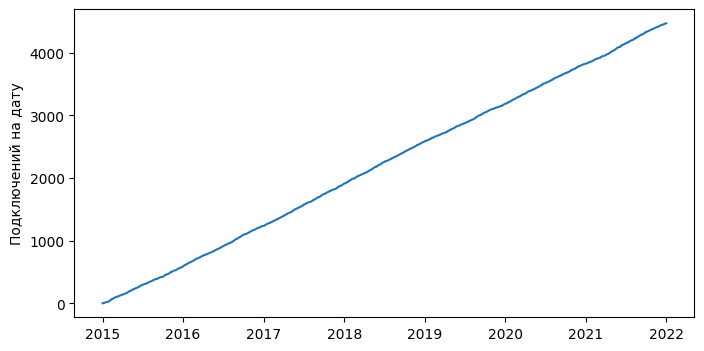

In [405]:
# Шаг 3. Провести исследовательский анализ данных:
# в разрезе значений признаков Год подключения, Месяц подключения, Дата подключения исследуйте:
# динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год и месяц подключались 
# меньше/больше всего клиентов? Какие выводы можно сделать?

df_ct = df_c[['act_year', 'act_month']]
df_ct.columns = df_ct.columns.map(invert(header_translate_dict))
monthly_stats = df_ct.groupby(['Год подключения', 'Месяц подключения'], as_index=False).size()
display(df_ct.groupby(['Год подключения', 'Месяц подключения'], as_index=True).size().unstack())

plt.subplots(1, 2, figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_stats, x='Месяц подключения', y='size', errorbar='sd')
for txt in ax.xaxis.get_ticklabels():
    txt.set_rotation(45)
ax.set_ylim((0, ax.get_ylim()[1]))
ax.set_ylabel('Подключений в месяц')

ax = plt.subplot(1, 2, 2)
sns.barplot(data=monthly_stats, x='Год подключения', y='size', estimator='sum', errorbar=None)
ax.set_ylabel('Подключений в год')


date_cum = df_c.groupby('act_date', as_index=False).size()
date_cum['size'] = date_cum['size'].cumsum()

plt.figure(figsize=(8, 4))
ax = sns.lineplot(data=date_cum, x='act_date', y='size')
ax.set_ylabel('Подключений на дату')
ax.set_xlabel(None)

act_min_date = monthly_stats.loc[monthly_stats['size'].idxmin(), ['Год подключения', 'Месяц подключения']]
act_max_date = monthly_stats.loc[monthly_stats['size'].idxmax(), ['Год подключения', 'Месяц подключения']]
print('меньше всего клиентов подключались в %s' % str(list(act_min_date)))
print('больше всего клиентов подключались в %s' % str(list(act_max_date)))

**Выводы**
- Продажи не показывают заметной сезонности, колебания и кажущиеся минимумы/максимумы незначительны и могут быть объяснены флуктуацией
- Количество новых подключений не изменяется от года к году, экспоненциального роста не демонстрирует. Вероятно, рынок насыщен.
- Минимальное количество клиентов в месяц подключилось в 1/'15 (35 чел)
- Максимальное количество клиентов в месяц подключилось в 8/'16 (67 чел)

variable          Среднемесячный расход  Средняя продолжительность разговоров  \
metric cat_age                                                                  
mean   студент               231.564757                              2.847665   
       аспирант              697.951898                              5.369891   
       бизнесмен             513.411028                              4.265297   
       знаток                442.315053                              3.723440   
median студент               137.955000                              2.400000   
       аспирант              458.850000                              4.400000   
       бизнесмен             335.700000                              3.400000   
       знаток                226.800000                              2.800000   
mode   студент               314.965000                              3.000000   
       аспирант              314.965000                              2.400000   
       бизнесмен             314.965000                              1.700000   
       знаток                 16.800000                              2.500000   

variable          Звонков днем за месяц  Звонков вечером за месяц  \
metric cat_age                                                      
mean   студент                38.373541                 68.708171   
       аспирант               80.385732                 85.367594   
       бизнесмен              65.607042                 69.922299   
       знаток                 56.712329                 54.194825   
median студент                35.000000                 70.000000   
       аспирант               63.000000                 85.000000   
       бизнесмен              55.000000                 70.000000   
       знаток                 44.000000                 51.000000   
mode   студент                32.000000                 61.000000   
       аспирант               55.000000                 76.000000   
       бизнесмен              62.000000                  4.000000   
       знаток                  5.000000                  3.000000   

variable          Звонков ночью за месяц  Звонки в другие города  \
metric cat_age                                                     
mean   студент                  9.931907                1.060311   
       аспирант                14.282950               11.188634   
       бизнесмен                3.902469                9.911777   
       знаток                   2.083714                6.878234   
median студент                  7.000000                0.000000   
       аспирант                 3.000000                5.000000   
       бизнесмен                0.000000                3.000000   
       знаток                   0.000000                0.000000   
mode   студент                  0.000000                0.000000   
       аспирант                 0.000000                0.000000   
       бизнесмен                0.000000                0.000000   
       знаток                   0.000000                0.000000   

variable          Звонки в другие страны  \
metric cat_age                             
mean   студент                  0.110895   
       аспирант                 0.512696   
       бизнесмен                0.418859   
       знаток                   0.380518   
median студент                  0.000000   
       аспирант                 0.000000   
       бизнесмен                0.000000   
       знаток                   0.000000   
mode   студент                  0.000000   
       аспирант                 0.000000   
       бизнесмен                0.000000   
       знаток                   0.000000   

variable          Доля звонков на стационарные телефоны  \
metric cat_age                                            
mean   студент                                 4.027237   
       аспирант                               11.282950   
       бизнесмен                              11.248078   
       знаток                    

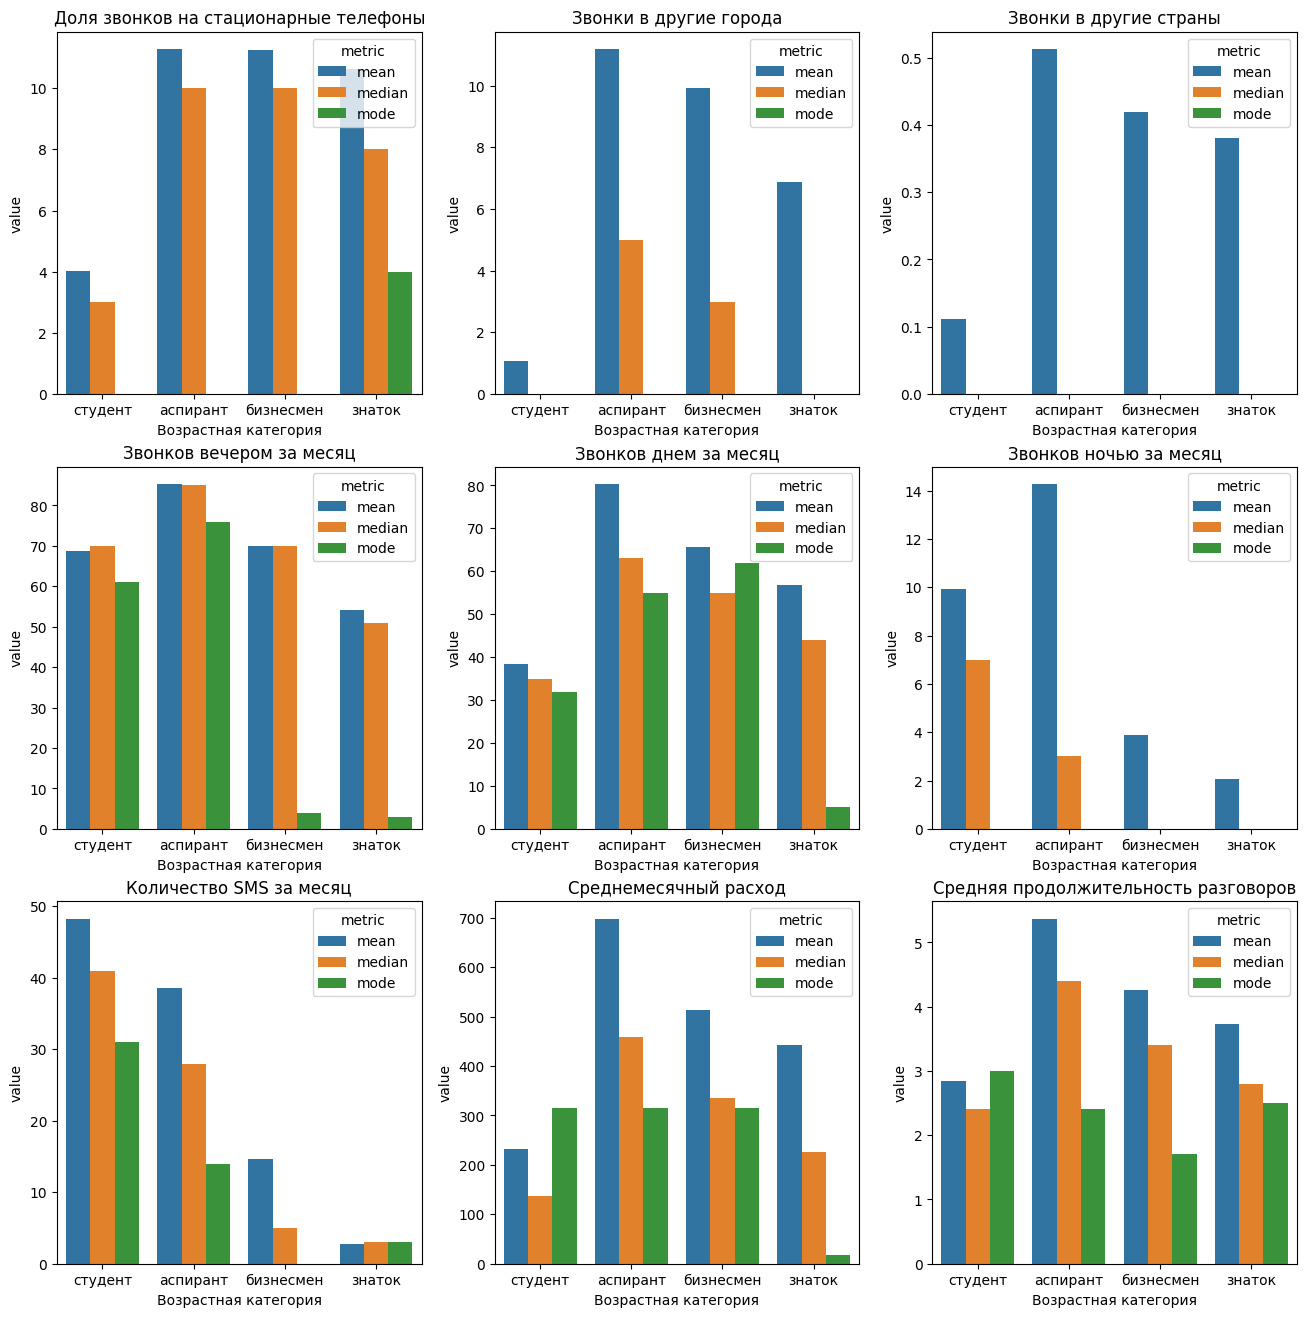

In [507]:
# в разрезе значений признака Возрастная категория исследуйте распределение признаков Среднемесячный расход, 
# Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, 
# Звонки в другие города, Доля звонков на стационарные телефоны, Количество SMS за месяц. 
# Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики.
# Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых 
# услуг (звонков и SMS; времени суток);
#

def mode(ser):
    return ser.mode()[0]

COI = ['avg_bill', 'avg_call_duration', 'calls_day', 'calls_evening', 'calls_night', 'calls_intercity',
       'calls_international', 'fraction_stationary', 'num_sms']
metrics = 'mean,median'.split(',') + [mode]

df_age = df_c.groupby('cat_age')[COI].agg(metrics)
df_age.columns.rename(['variable', 'metric'], inplace=True)
display(df_age.stack().swaplevel().sort_index().rename(columns=invert(header_translate_dict)))

df_age = df_age.stack().stack().reset_index().rename(columns={0:'value'})
# display(df_age)
df_age['variable'] = df_age['variable'].map(invert(header_translate_dict).get)

plt.subplots(3, 3, figsize=(16, 16))
for i,(v,df) in enumerate(df_age.groupby('variable')):
    df = df.rename(columns=invert(header_translate_dict))
    ax = plt.subplot(3, 3, i+1)
    ax.set_title(v)
    sns.barplot(data=df, x=invert(header_translate_dict)['cat_age'], y='value', hue='metric')
plt.show()

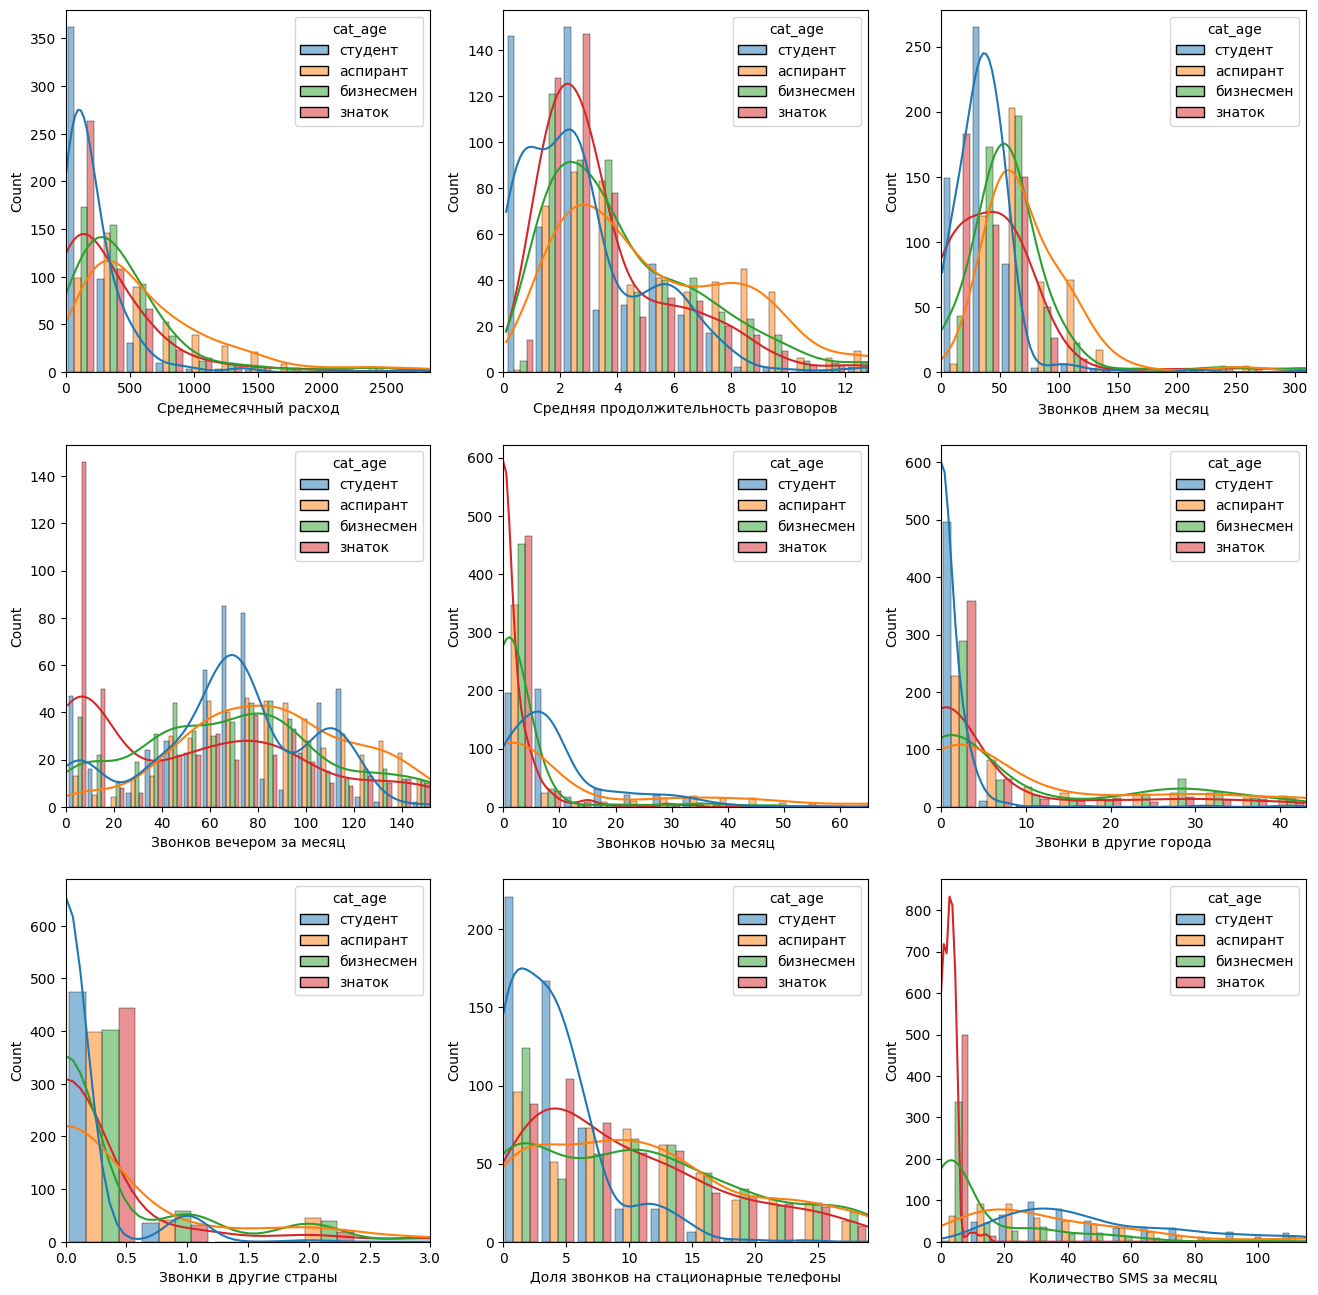

In [557]:
import numpy as np
cat_size_min = min(df_c.groupby('cat_age').size())

fridge = []
for cat in df_c['cat_age'].unique():
    mask = df_c['cat_age'] == cat
    indices = df_c.index[mask]
    indices = np.random.choice(indices, cat_size_min, replace=False)   # pick random sample of equal size from each category 
    fridge += list(indices)
indices = sorted(fridge)  # equalize group sizes
    
plt.subplots(3, 3, figsize=(16, 16))
for i,(coi) in enumerate(COI):
    df = df_c.loc[indices, [coi, 'cat_age']]
    ax = plt.subplot(3, 3, i+1)
    sns.histplot(df, x=coi, hue='cat_age', stat='count', bins=20, multiple='dodge', shrink=.9, kde=True)#element='poly')
    ax.set_xlabel(invert(header_translate_dict)[ax.get_xlabel()])
    ax.set_xlim(0, df[coi].quantile(.98))

In [549]:
# клиенты каких возрастных категорий (ТОП-2):
# больше всего в среднем в месяц тратят на оплату услуг связи;
# больше всего тратят времени на общение в месяц днем, вечером и ночью;
# больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;
# Какие выводы можно сделать?
print('больше всего в среднем в месяц тратят на оплату услуг связи')
print(dict(df_c.groupby('cat_age')['avg_bill'].mean().sort_values(ascending=False).head(2)))

call_daytimes = ['calls_day', 'calls_evening', 'calls_night']
print('больше всего тратят времени на общение в месяц днем, вечером и ночью')
for daytime in call_daytimes:
    df_tmp = df_c.loc[:, ['cat_age', daytime, 'avg_call_duration']]
    df_tmp['avg_factorized_duration'] = df_tmp['avg_call_duration']*df_tmp[daytime]
    print(daytime, dict(df_tmp.groupby('cat_age')['avg_factorized_duration'].mean().sort_values(ascending=False).head(2)))

print('больше всего по количеству звонков в месяц днем, вечером и ночью')
for daytime in call_daytimes:
    print(daytime, dict(df_c.groupby('cat_age')[daytime].mean().sort_values(ascending=False).head(2)))

больше всего в среднем в месяц тратят на оплату услуг связи
{'аспирант': 697.9518984280531, 'бизнесмен': 513.4110279239175}
больше всего тратят времени на общение в месяц днем, вечером и ночью
calls_day {'аспирант': 521.6613059250302, 'бизнесмен': 369.31513557264265}
calls_evening {'аспирант': 494.79395405078594, 'бизнесмен': 332.1375758802104}
calls_night {'аспирант': 115.2837968561064, 'студент': 35.31264591439689}
больше всего по количеству звонков в месяц днем, вечером и ночью
calls_day {'аспирант': 80.3857315598549, 'бизнесмен': 65.60704168352893}
calls_evening {'аспирант': 85.36759371221282, 'бизнесмен': 69.92229866450829}
calls_night {'аспирант': 14.282950423216445, 'студент': 9.931906614785992}


**Выводы**
- Для возрастной категории "студент" характерно очень малое количество звонков в другие города, страны и на стационарные телефоны; низкиий среднемесячный расход и небольшая продолжительность разговора; самое большое использование SMS. "Студенты" чаще всего звонят вечером и ночью. Днём совершают меньше звонков чем другие категории.
- Для возрастной категории "аспирант" характерны самые высокие среднемесячный расход и средняя продолжительность разговора (однако эти показатели не отличаются значительно от таковых для категорий "знаток" и "бизнесмен"); активное использование SMS. Эта категория совершает звонки в другие страны и города чаще чем остальные; умеренная частота звонков на стационарные телефоны. Чаще всего совершает звонки днём или вечером; иногда звонит ночью.
- Для возрастной категории "бизнесмен" характерны средние значения среднемесячного расхода и продолжительности разговора; нечастое использование SMS. Средняя частота звонков в другие страны и города, на стационарные телефоны. Чаще всего совершает звонки днём или вечером; мало звонков ночью.
- Для возрастной категории "знаток" характерны средние значения среднемесячного расхода и продолжительности разговора; очень редкое использование SMS. Средняя частота звонков в другие страны и города, на стационарные телефоны. Чаще всего совершает звонки днём или вечером; почти не совершает звонков ночью.

"Студенты" почти не звонят на стационарные и иногородние/иностранные номера, часто используют SMS, преимущественно активны вечером и ночью. Маленький среднемесячный расход.
"Знатоки" почти не используют SMS и не звонят ночью.
"Аспиранты" используют SMS и звонят ночью, говорят дольше остальных.

При определении времени разговора по времени дня доминирующим фактором является число совершаемых звонков, т.к. оно отличается гораздо сильнее у различных категорий чем среднее время разговора.

При оценке пунктов _"больше всего тратят времени на общение в месяц днем, вечером и ночью"_ и _"больше всего по количеству звонков в месяц днем, вечером и ночью"_ не определена однозначно агрегирующая функция. Использовалось среднее арифметическое. При перемножении средних теряется информация о зависимости пременных веремени разговора и времени дня. Оценка времени разговора по времени дня таким образом неточна.